In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
import os
warnings.filterwarnings('ignore')

In [5]:
init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
data = pd.read_csv("data.csv")

In [9]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Checking Number of Categorical and numerical variables in the dataset

In [15]:
print('Number of Categorical Columns: ', len(data.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(data.select_dtypes(exclude=object).columns))

Number of Categorical Columns:  38
Number of Numerical Columns:  41


In [ ]:
Dropping all the Variables which are not required

In [ ]:
data.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Release Clause',
                   'Joined', 'Contract Valid Until'], inplace=True)

#Check for missing values in columns where missing values is more than half of the total number of values.

In [18]:
data.isnull().sum()[data.isnull().sum() >= 9000]

Loaned From    16943
dtype: int64

#Dropping column based on above condition

In [19]:
data.drop(columns=['Loaned From'], inplace=True)

#Checking for the variables with missing values

In [20]:
data.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
GKDiving         48
GKHandling       48
GKKicking        48
GKPositioning    48
GKReflexes       48
Length: 78, dtype: int64

#jPlayers who are not part of any club.

In [21]:
data['Club'].fillna(value='No Club', inplace=True)

#Checking if preferred foot is present for every player

In [22]:
data[data['Preferred Foot'].isna()].head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,J. McNulty,33,Scotland,62,62,Rochdale,€120K,€1K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,J. Stead,35,England,62,62,Notts County,€140K,€3K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,A. Semprini,20,Italy,62,72,Brescia,€425K,€1K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,R. Bingham,24,England,62,66,Hamilton Academical FC,€400K,€1K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Full of NaN values for many features, so drop.

In [23]:
data.drop(index=data[data['Preferred Foot'].isna()].index, inplace=True)

In [24]:
data[data['Position'].isna()][['Name', 'Nationality', 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                              'LAM', 'CAM', 'RAM', 'LM', 'LCM','CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                              'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,Name,Nationality,LS,ST,RS,LW,LF,CF,RF,RW,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
5018,R. Raldes,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6736,J. Arce,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7922,L. Gutiérrez,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9905,R. Vargas,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10628,D. Bejarano,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Dropping all the records with missing values in position as LS, CAM, RS, etc are also missing

In [25]:
data.drop(index=data[data['Position'].isna()].index, inplace=True)

#Checking the number of missing values in the remaining columns

In [26]:
data.isnull().sum()[data.isnull().sum() > 0]

LS     2025
ST     2025
RS     2025
LW     2025
LF     2025
CF     2025
RF     2025
RW     2025
LAM    2025
CAM    2025
RAM    2025
LM     2025
LCM    2025
CM     2025
RCM    2025
RM     2025
LWB    2025
LDM    2025
CDM    2025
RDM    2025
RWB    2025
LB     2025
LCB    2025
CB     2025
RCB    2025
RB     2025
dtype: int64

In [27]:
len(data[data['Position'] == 'GK'])

2025

Looks like the above features are not set for Goalkeepers. We cannot drop them as it would remove all the goal keepers from our dataset. Instead we will fill these values with 0.

In [28]:
data.fillna(value=0, inplace=True)

In [29]:
data.isnull().sum().sum()

0

Converting categorical features to appropriate numerical features

In [30]:
data.select_dtypes(include=object).columns

Index(['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

#Function to convert value and wage of the player.

In [33]:
def currencyConverter(val):
    if val[-1] == 'M':
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif val[-1] == 'K':
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0
    

In [34]:
data['Value in Pounds'] = data['Value'].apply(currencyConverter)
data['Wage in Pounds'] = data['Wage'].apply(currencyConverter)

data.drop(columns=['Value', 'Wage'], inplace=True)

In [35]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value in Pounds,Wage in Pounds
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5.0,4.0,4.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,4.0,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5.0,5.0,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0
3,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,1.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4.0,5.0,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0


In [36]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [38]:
#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [40]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in skill_columns:
    data[col] = data[col].apply(skillConverter)

In [42]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,...,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,...,68,63,63,63,68,63,50,50,50,63
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85,85,85,90,90,90,90,90,91,91,...,80,80,80,80,80,76,69,69,69,76


In [43]:
data[['Height', 'Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [45]:
#Function to convert heights to cms and weights to pounds
def height_converter(val):
    f = val.split("'")[0]
    i = val.split("'")[1]
    h = (int(f) * 30.48) + (int(i)*2.54)
    return h

def weight_converter(val):
    w = int(val.split('lbs')[0])
    return w

In [46]:
data['Height in Cms'] = data['Height'].apply(height_converter)
data['Weight in Pounds'] = data['Weight'].apply(weight_converter)

data.drop(columns=['Height', 'Weight'], inplace=True)
data[['Height in Cms', 'Weight in Pounds']].head()

,Height in Cms,Weight in Pounds
0,170.18,159
1,187.96,183
2,175.26,150
3,193.04,168
4,180.34,154


In [48]:
data[['Work Rate', 'Body Type', 'Position']].head()

,Work Rate,Body Type,Position
0,Medium/ Medium,Messi,RF
1,High/ Low,C. Ronaldo,ST
2,High/ Medium,Neymar,LW
3,Medium/ Medium,Lean,GK
4,High/ High,Normal,RCM


In [49]:
data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [50]:
data['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [51]:
data['Body Type'][data['Body Type'] == 'Messi'] = 'Lean'
data['Body Type'][data['Body Type'] == 'C. Ronaldo'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Neymar'] = 'Lean'
data['Body Type'][data['Body Type'] == 'Courtois'] = 'Lean'
#PLAYER_BODY_TYPE_25 is the body type of Mohammed Salah who has a Normal body type.
data['Body Type'][data['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Shaqiri'] = 'Stocky'
data['Body Type'][data['Body Type'] == 'Akinfenwa'] = 'Stocky'

In [52]:
print(data['Position'].unique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


#Simplifying the above positions into 4 simple categories of - Forwards, Midfielders, Defenders and GoalKeepers

In [53]:
def position_simplifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'F'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val

In [54]:
data['Position'] = data['Position'].apply(position_simplifier)
data['Position'].value_counts()

M     7589
D     5866
F     2667
GK    2025
Name: Position, dtype: int64

#Import required libraries for modelling

In [55]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

#Transforming categorical feature into numeric.
#Goal Keeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3

In [56]:
def pos_numeric(val):
    if val == 'GK':
        return 0
    elif val == 'D':
        return 1
    elif val == 'M':
        return 2
    else:
        return 3
    
data['Position'] = data['Position'].apply(pos_numeric)

In [57]:
df_pos = data.copy()

#Dropping unnecessary columns

In [58]:
df_pos.drop(columns=['Name', 'Nationality', 'Club'], inplace=True)

In [59]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#LOGISTIC REGRESSION MODEL

In [61]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
prediction = logmodel.predict(X_test)

In [64]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       0.92      0.86      0.89      1747
           2       0.82      0.91      0.86      2302
           3       0.87      0.72      0.79       789

    accuracy                           0.88      5445
   macro avg       0.90      0.87      0.89      5445
weighted avg       0.88      0.88      0.88      5445



[[ 607    0    0    0]
 [   0 1498  249    0]
 [   0  118 2097   87]
 [   0    9  210  570]]


Accuracy Score:  0.8764003673094583


#Just by dropping a few columns and without any fine tuning, the Logisitic Regression model gets a pretty good accuracy score.

We can see that we get a 100% accuracy for goal keepers. This is expected as the features such as LS, RS, CF, etc. is equal to 0 for all the goal keepers in our dataset.

Let us try to increase the accuracy in classifying other positions.

#Correlation between Position and other features

In [65]:
df_pos.corr().abs()['Position'].sort_values(ascending=False)

Position                    1.000000
Finishing                   0.824777
LS                          0.764850
ST                          0.764850
RS                          0.764850
                              ...   
Wage in Pounds              0.055402
Overall                     0.054307
Marking                     0.045772
International Reputation    0.036202
Strength                    0.010477
Name: Position, Length: 72, dtype: float64

#Notice how similar features such as LS, ST and RS and so on have similar correlation. Let us combine such features into individual single features.

In [67]:
df_pos['Frw'] = (df_pos['RF'] + df_pos['ST'] + df_pos['LF'] + df_pos['RS'] + df_pos['LS'] + df_pos['CF']) / 6

df_pos['Mid'] = (df_pos['LW'] + df_pos['RCM'] + df_pos['LCM'] + df_pos['LDM'] + df_pos['CAM'] + df_pos['CDM'] + \
                df_pos['RM'] + df_pos['LAM'] + df_pos['LM'] + df_pos['RDM'] + df_pos['RW'] + df_pos['CM'] + df_pos['RAM'])\
                /13

df_pos['Def'] = (df_pos['RCB'] + df_pos['CB'] + df_pos['LCB'] + df_pos['LB'] + df_pos['RB'] + df_pos['RWB']\
                 + df_pos['LWB']) / 7

df_pos['Gk'] = (df_pos['GKDiving'] + df_pos['GKHandling'] + df_pos['GKKicking'] + df_pos['GKPositioning']\
               + df_pos['GKReflexes']) / 5

df_pos.drop(columns=['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM',
                     'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB',
                     'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
                    ], inplace=True)

In [68]:
print('Correlation with Position: ', df_pos.corr().abs()['Position'].sort_values(ascending=False).index, '\n')
print('Categorical columns in dataset: ', df_pos.select_dtypes(include=object).columns, '\n')
print('Number of features in dataset: ', len(df_pos.columns))

Correlation with Position:  Index(['Position', 'Finishing', 'Positioning', 'Frw', 'Penalties', 'Volleys',
       'LongShots', 'Dribbling', 'ShotPower', 'BallControl', 'Mid', 'Gk',
       'Skill Moves', 'Curve', 'ShortPassing', 'Agility', 'FKAccuracy',
       'Vision', 'Acceleration', 'SprintSpeed', 'HeadingAccuracy', 'Balance',
       'Crossing', 'Stamina', 'Def', 'LongPassing', 'Composure',
       'Height in Cms', 'Weak Foot', 'Weight in Pounds', 'Aggression',
       'SlidingTackle', 'Reactions', 'Interceptions', 'StandingTackle',
       'Potential', 'Age', 'Value in Pounds', 'Jumping', 'Jersey Number',
       'Wage in Pounds', 'Overall', 'Marking', 'International Reputation',
       'Strength'],
      dtype='object') 

Categorical columns in dataset:  Index(['Preferred Foot', 'Work Rate', 'Body Type'], dtype='object') 

Number of features in dataset:  48


#By combining certain features, we have brought down the nubmber of features from 75 to 48.

#Dropping Preferred Foot column too as it does not play a significant role in classifying the position of the player. 

In [69]:
df_pos.drop(columns=['StandingTackle', 'Potential', 'Age', 'Value in Pounds', 
                     'Jumping', 'Jersey Number', 'Wage in Pounds', 'Overall', 'Marking',
                     'International Reputation', 'Strength', 'Preferred Foot'], inplace=True)

In [70]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [71]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
prediction = logmodel.predict(X_test)

In [73]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       0.92      0.86      0.89      1747
           2       0.82      0.91      0.86      2302
           3       0.87      0.72      0.79       789

    accuracy                           0.88      5445
   macro avg       0.90      0.87      0.89      5445
weighted avg       0.88      0.88      0.88      5445



[[ 607    0    0    0]
 [   0 1498  249    0]
 [   0  118 2097   87]
 [   0    9  210  570]]


Accuracy Score:  0.8764003673094583


#There is no change in accuracy from previous

#Let's try to remove outliers in the data and try to develop a new model.

In [74]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 12, 8

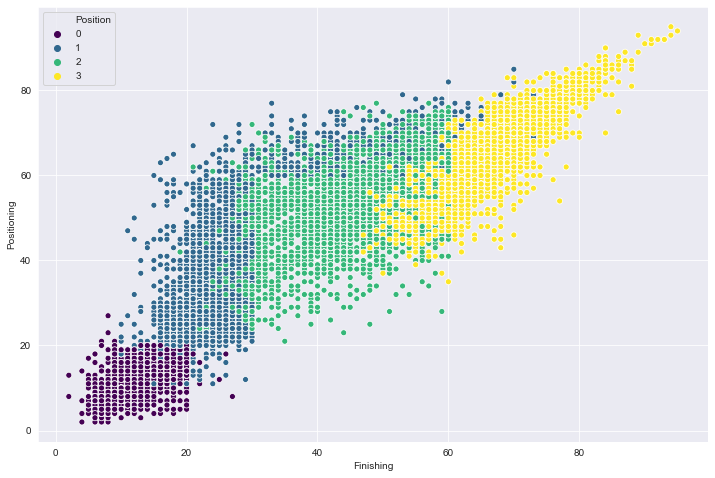

In [108]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

#From the above visualization, you can notice several outliers. Let us remove them.

In [77]:
df_pos = df_pos[~((df_pos['Position'] == 1) & (df_pos['Finishing'] > 30) & (df_pos['Positioning'] < 60))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 60) & (df_pos['Positioning'] < 80))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 45))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 60) & (df_pos['Positioning'] > 70))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 65) & (df_pos['Positioning'] > 70))]

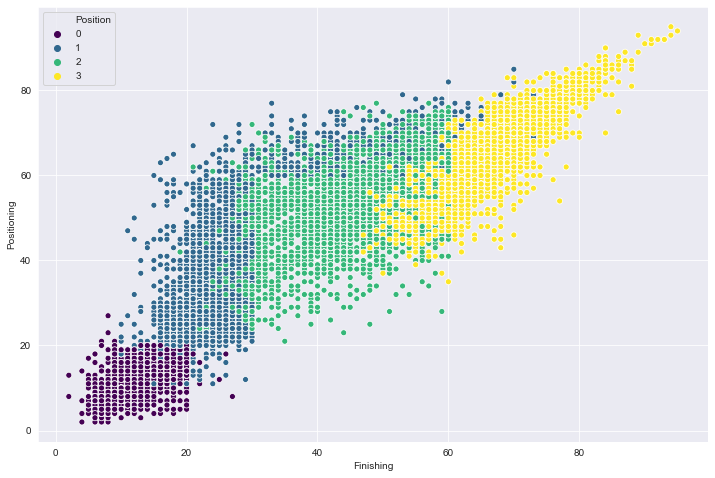

In [78]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

#There are still several outliers present but if we try and remove them, it might lead to overfitting.

Let us now test our model after removing outliers.

In [79]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
prediction = logmodel.predict(X_test)

In [81]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       0.92      0.91      0.92      1019
           2       0.91      0.92      0.91      1455
           3       0.95      0.94      0.94       799

    accuracy                           0.93      3881
   macro avg       0.94      0.94      0.94      3881
weighted avg       0.93      0.93      0.93      3881



[[ 608    0    0    0]
 [   0  930   87    2]
 [   0   80 1335   40]
 [   0    1   45  753]]


Accuracy Score:  0.9342952847204329


#The overall accuracy of the model increases. Our model is now able to better classify Midfielders and Forwards.

#Let us feed the above data into a different classification model and see how it performs.

In [82]:
from sklearn.svm import SVC

In [94]:
svmmodel = SVC(kernel='linear')

In [95]:
svmmodel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
prediction = svmmodel.predict(X_test)

In [97]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       0.92      0.94      0.93      1019
           2       0.93      0.92      0.93      1455
           3       0.96      0.95      0.96       799

    accuracy                           0.94      3881
   macro avg       0.95      0.95      0.95      3881
weighted avg       0.94      0.94      0.94      3881



[[ 608    0    0    0]
 [   0  953   65    1]
 [   0   83 1342   30]
 [   0    4   33  762]]


Accuracy Score:  0.9443442411749549


The Accuracy of the SVM classifier is higher than Logistic Classifier and Naive Bayes Classifier

#NAIVE BAYES ALGORITHM

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [100]:
#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
prediction = gnb.predict(X_test)

In [106]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       0.71      0.76      0.73      1019
           2       0.77      0.59      0.67      1455
           3       0.74      0.98      0.84       799

    accuracy                           0.78      3881
   macro avg       0.80      0.83      0.81      3881
weighted avg       0.78      0.78      0.77      3881



[[608   0   0   0]
 [  0 776 239   4]
 [  0 320 863 272]
 [  0   2  17 780]]


Accuracy Score:  0.7799536202009791


The accuracy of Naive Bayes model is not as good as Logistic Classifier and SVM Classifier.